In [3]:
import yfinance as yf

In [4]:
sp500 = yf.Ticker("^GSPC")

In [5]:
sp500 = sp500.history(period = "max")

In [6]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-02-22 00:00:00-05:00,4001.830078,4017.370117,3976.899902,3991.050049,4079320000,0.0,0.0
2023-02-23 00:00:00-05:00,4018.600098,4028.300049,3969.189941,4012.320068,3952940000,0.0,0.0
2023-02-24 00:00:00-05:00,3973.239990,3978.250000,3943.080078,3970.040039,3877700000,0.0,0.0


In [7]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-02-14 00:00:00-05:00', '2023-02-15 00:00:00-05:00',
               '2023-02-16 00:00:00-05:00', '2023-02-17 00:00:00-05:00',
               '2023-02-21 00:00:00-05:00', '2023-02-22 00:00:00-05:00',
               '2023-02-23 00:00:00-05:00', '2023-02-24 00:00:00-05:00',
               '2023-02-27 00:00:00-05:00', '2023-02-28 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=23904, freq=None)

<AxesSubplot:xlabel='Date'>

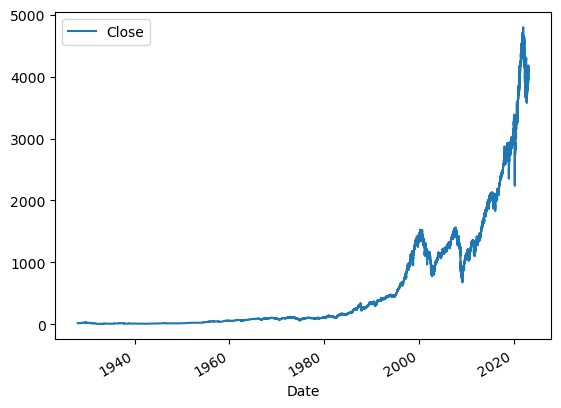

In [8]:
#Cleaning and visualizing our stock market data
sp500.plot.line(y="Close", use_index=True)

In [9]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [10]:
#Setting up our target for machine learning
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [11]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [12]:
sp500 = sp500.loc["1990-01-01":].copy()

In [13]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-02-22 00:00:00-05:00,4001.830078,4017.370117,3976.899902,3991.050049,4079320000,4012.320068,1
2023-02-23 00:00:00-05:00,4018.600098,4028.300049,3969.189941,4012.320068,3952940000,3970.040039,0
2023-02-24 00:00:00-05:00,3973.239990,3978.250000,3943.080078,3970.040039,3877700000,3982.239990,1


In [14]:
#Training an initial Machine learning model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100, min_samples_split = 100, random_state = 1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [28]:
#Measuring how accurate the model is 
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [29]:
import pandas as pd

preds = pd.Series(preds, index = test.index)

In [30]:
precision_score(test["Target"], preds)

0.38235294117647056

In [31]:
combined = pd.concat([test["Target"], preds], axis = 1)

<AxesSubplot:xlabel='Date'>

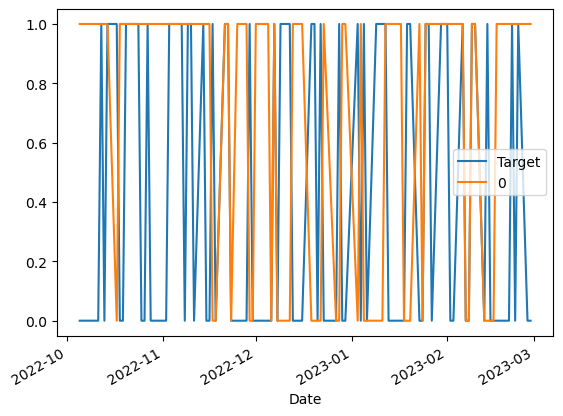

In [32]:
combined.plot()

In [33]:
#Building a backtesting system 

def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis = 1)
    return combined

In [34]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [36]:
predictions = backtest(sp500, model, predictors)

In [37]:
predictions["Predictions"].value_counts()

0    3401
1    2453
Name: Predictions, dtype: int64

In [38]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5275173257236038

In [39]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.533652
0    0.466348
Name: Target, dtype: float64

In [41]:
#Adding additional predictors to our model

horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors += [ratio_column, trend_column]

In [42]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-22 00:00:00-05:00,4001.830078,4017.370117,3976.899902,3991.050049,4079320000,4012.320068,1,0.999213,0.0,0.982751,1.0,1.002020,25.0,0.991017,111.0,1.084757,535.0
2023-02-23 00:00:00-05:00,4018.600098,4028.300049,3969.189941,4012.320068,3952940000,3970.040039,0,1.002658,1.0,0.994615,1.0,1.007419,26.0,0.996572,111.0,1.090170,536.0
2023-02-24 00:00:00-05:00,3973.239990,3978.250000,3943.080078,3970.040039,3877700000,3982.239990,1,0.994703,1.0,0.990043,1.0,0.996778,26.0,0.986477,110.0,1.078325,536.0


In [43]:
sp500 = sp500.dropna()

In [44]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-21 00:00:00-05:00,4052.350098,4052.350098,3995.189941,3997.340088,4121590000,3991.050049,0,0.989878,0.0,0.977318,1.0,1.003447,26.0,0.992348,111.0,1.086821,535.0
2023-02-22 00:00:00-05:00,4001.830078,4017.370117,3976.899902,3991.050049,4079320000,4012.320068,1,0.999213,0.0,0.982751,1.0,1.002020,25.0,0.991017,111.0,1.084757,535.0
2023-02-23 00:00:00-05:00,4018.600098,4028.300049,3969.189941,4012.320068,3952940000,3970.040039,0,1.002658,1.0,0.994615,1.0,1.007419,26.0,0.996572,111.0,1.090170,536.0


In [45]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)


In [46]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis = 1)
    return combined

In [47]:
predictions = backtest(sp500, model, new_predictors)

In [48]:
predictions["Predictions"].value_counts()

0.0    4040
1.0     813
Name: Predictions, dtype: int64

In [50]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5694956949569495